In [4]:
import pandas
import seaborn as sns
from matplotlib import pyplot as plt

# Strong scaling analysis

In [11]:
# descriptors for strong scaling
descriptor = [256, 128, 64, 32, 16, 8, 4, 2, 1]
max_cycles_cold = [16749, 28490, 53735, 104277, 208116, 415810, 831202, 1648994, 3019207]  # old: 7015874
max_cycles_hot = [16880, 28246, 53210, 104691, 208060, 415748, 831111, 1648901, 3019207] # old: 7015766
max_speedup_cold = [max_cycles_cold[8]/x for x in max_cycles_cold]
efficiency_cold = [x/y for x,y in zip(max_speedup_cold, descriptor)]
max_speedup_hot = [max_cycles_hot[8]/x for x in max_cycles_hot]
efficiency_hot = [x/y for x,y in zip(max_speedup_hot, descriptor)]
# input matrix is 64x64xint32
inp_size_kib = [64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024, 64*64*4/1024]

In [12]:
# create dataframe
df = pandas.DataFrame({'# cores': descriptor, 'max_cycles_cold': max_cycles_cold, 'max_cycles_hot': max_cycles_hot, 'max_speedup_cold': max_speedup_cold, 'max_speedup_hot': max_speedup_hot, 'inp_size_kib': inp_size_kib, 'efficiency_cold': efficiency_cold, 'efficiency_hot': efficiency_hot})
df.set_index('# cores', inplace=True)
df

,max_cycles_cold,max_cycles_hot,max_speedup_cold,max_speedup_hot,inp_size_kib,efficiency_cold,efficiency_hot
# cores,,,,,,,
256,16749,16880,180.261926,178.862974,16.0,0.704148,0.698683
128,28490,28246,105.974272,106.889719,16.0,0.827924,0.835076
64,53735,53210,56.186973,56.741346,16.0,0.877921,0.886584
32,104277,104691,28.953719,28.839222,16.0,0.904804,0.901226
16,208116,208060,14.507328,14.511232,16.0,0.906708,0.906952
8,415810,415748,7.261025,7.262108,16.0,0.907628,0.907764
4,831202,831111,3.632338,3.632736,16.0,0.908085,0.908184
2,1648994,1648901,1.830939,1.831042,16.0,0.915469,0.915521
1,3019207,3019207,1.000000,1.000000,16.0,1.000000,1.000000


In [67]:
df['max_cycles_cold'].iloc[8]

7015874

1
2
3
4
5
6
7
8
9


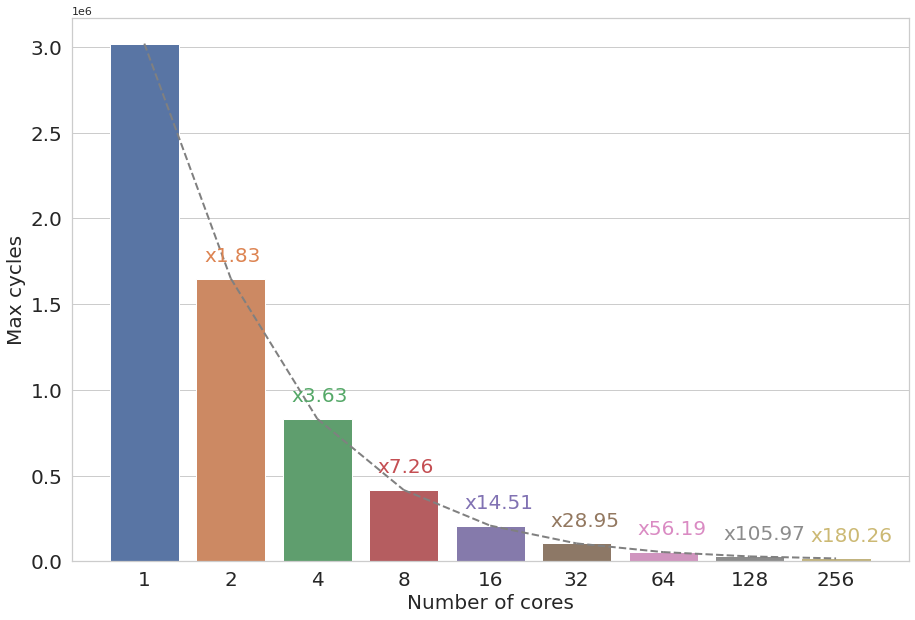

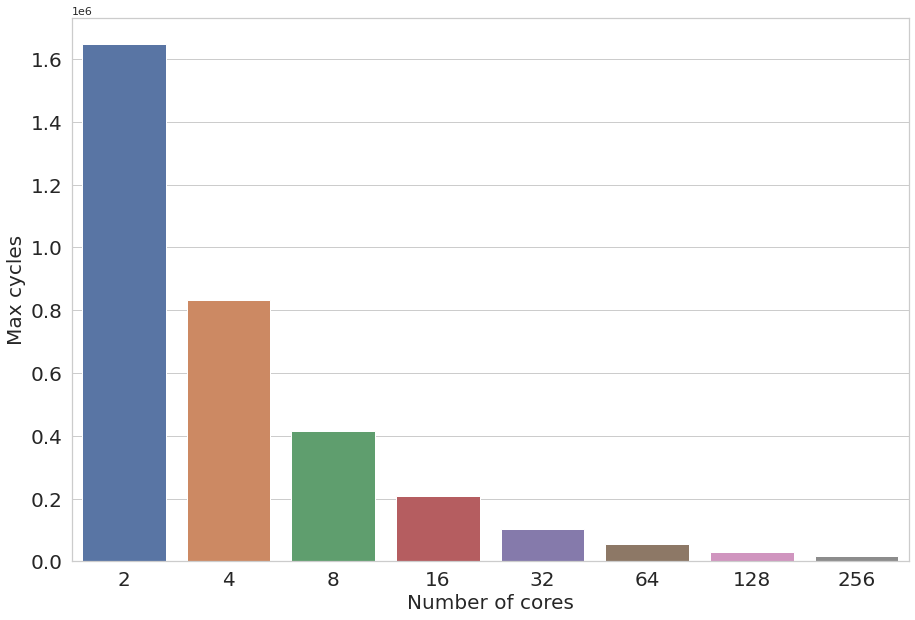

In [13]:
# sns plot for max cycles cold
sns.set(style="whitegrid")
# bar plot but skip the first value
ax = sns.barplot(x=df.index, y="max_cycles_cold", data=df)

cmap = sns.color_palette("deep", 9)
for idx, val in df['max_speedup_cold'].iteritems():
    if idx != 1:
        # get log2 of idx
        log2idx = int(idx).bit_length() - 1
        # print(idx)
        # make annotation same color as bar
        ax.annotate("x{:0.2f}".format(val), 
                    xy=(log2idx - 0.3, df['max_cycles_cold'][idx] + 100000), 
                    xytext=(0,0), 
                    textcoords="offset points",
                    fontsize=20,
                    color=cmap[log2idx])
# connect bars with lines
for idx, val in df['max_cycles_cold'].iteritems():
    # get number of current row
    row = df.index.get_loc(idx) + 1
    print(row)
    log2idx = int(idx).bit_length() - 1
    if row != 9:
        ax.plot([row-1, row], 
            [df['max_cycles_cold'].iloc[9 - row], 
            df['max_cycles_cold'].iloc[9 - row - 1]], 
            color='grey',
            linewidth=2,
            linestyle='--')
fig = ax.get_figure()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=20)
plt.xlabel(xlabel='Number of cores', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(ylabel='Max cycles', fontsize=20)
plt.show()

# make same plot, but without the last value
df2 = df.drop(df.index[-1])
ax = sns.barplot(x=df2.index, y="max_cycles_cold", data=df2)
fig = ax.get_figure()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=20)
plt.xlabel(xlabel='Number of cores', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(ylabel='Max cycles', fontsize=20)
plt.show()

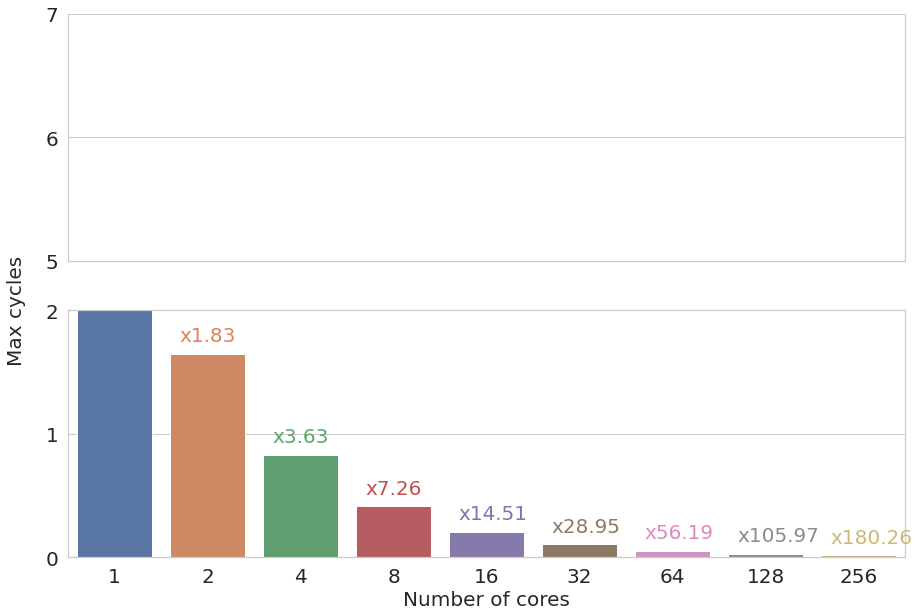

In [14]:
# create two subplots to break the y-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(15, 10)
# plot the first subplot
ax1 = sns.barplot(x=df.index, y="max_cycles_cold", data=df, ax=ax1)
# hide the x-axis
ax1.set_xlabel('')
# turn off the spines
ax1.spines['top'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# turn off grid
# ax1.grid(False)
ax1.set_ylabel(ylabel='Max cycles', fontsize=20, labelpad=20)
# move y label down
ax1.yaxis.set_label_coords(-0.05,-0.2)
ax1.set_ylim(5000000, 7000000)
ax1.set_yticks([5000000, 6000000, 7000000], fontsize=20)
# divide y axis by 1M
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))
# increse y tick font size
ax1.tick_params(axis='y', which='major', labelsize=20)

# # plot the second subplot
ax2 = sns.barplot(x=df.index, y="max_cycles_cold", data=df, ax=ax2)
# ax2.set_ylabel(ylabel='Max cycles', fontsize=20)
ax2.set_ylim(0, 2000000)
ax2.set_yticks([0, 1000000, 2000000], fontsize=20)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))
# ax2.grid(False)
ax2.set_xlabel(xlabel='Number of cores', fontsize=20)
# hide y labels
ax2.set_ylabel('')
# increase x tick font size
ax2.set_xticklabels(['1', '2', '4', '8', '16', '32', '64', '128', '256'], fontsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)

cmap = sns.color_palette("deep", 9)
for idx, val in df['max_speedup_cold'].iteritems():
    if idx != 1:
        # get log2 of idx
        log2idx = int(idx).bit_length() - 1
        # print(idx)
        # make annotation same color as bar
        ax2.annotate("x{:0.2f}".format(val), 
                    xy=(log2idx - 0.3, df['max_cycles_cold'][idx] + 100000), 
                    xytext=(0,0), 
                    textcoords="offset points",
                    fontsize=20,
                    color=cmap[log2idx])


In [69]:
df.columns

Index(['max_cycles_cold', 'max_cycles_hot', 'max_speedup_cold',
       'max_speedup_hot', 'inp_size_kib', 'efficiency_cold', 'efficiency_hot'],
      dtype='object')

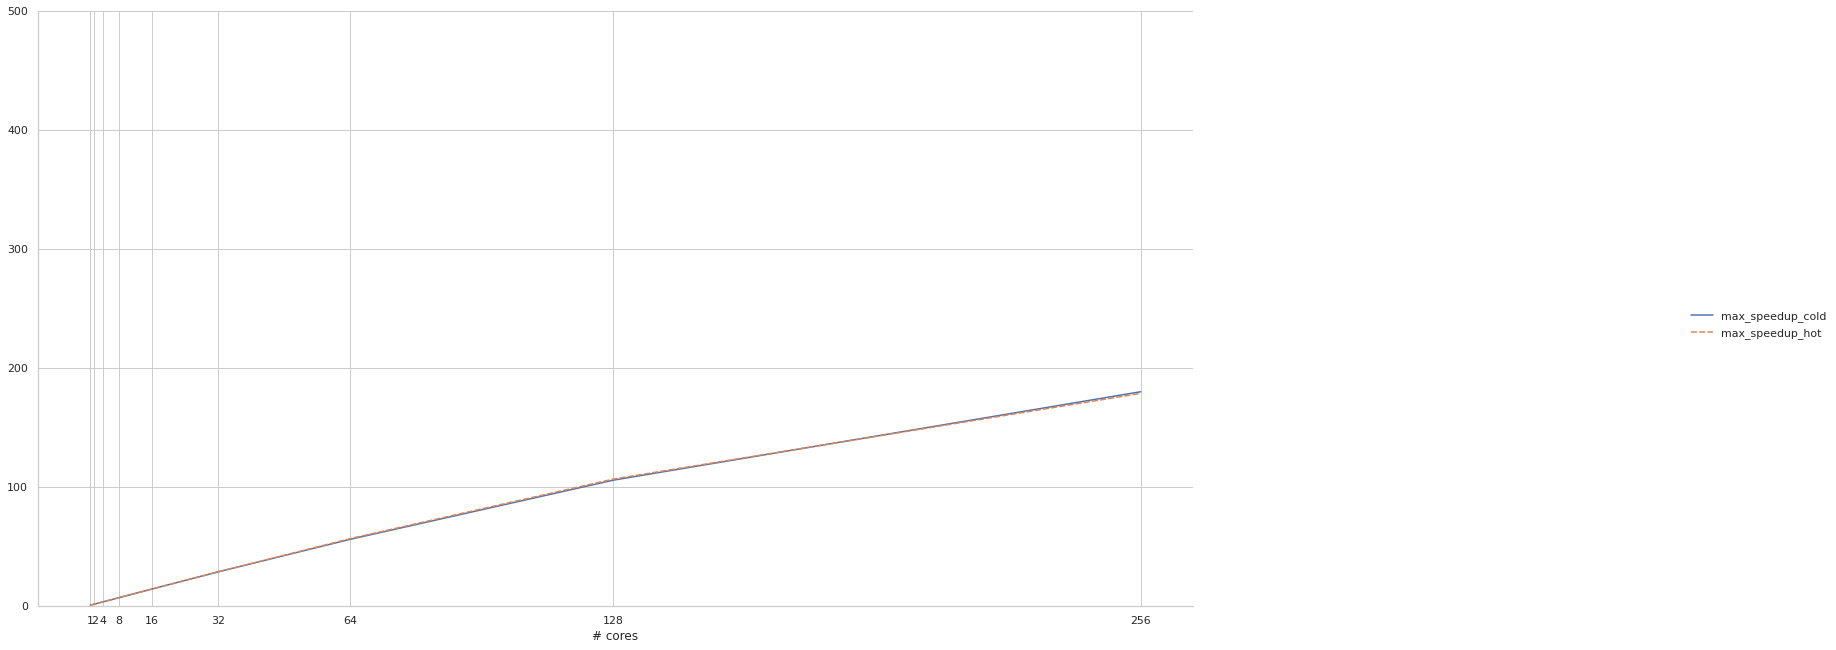

In [15]:
# relplot of hot vs cold
sns.relplot(data=df[['max_speedup_cold', 'max_speedup_hot']], kind="line")
# revert x axis
ax = plt.gca()
# ax.invert_xaxis()
# make plot wider
fig = ax.get_figure()
fig.set_size_inches(30, 10)
ax.set_xticks(df.index);
ax.set_ylim(0, 500)
# change axes to log scale
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

(0.0, 3.0)

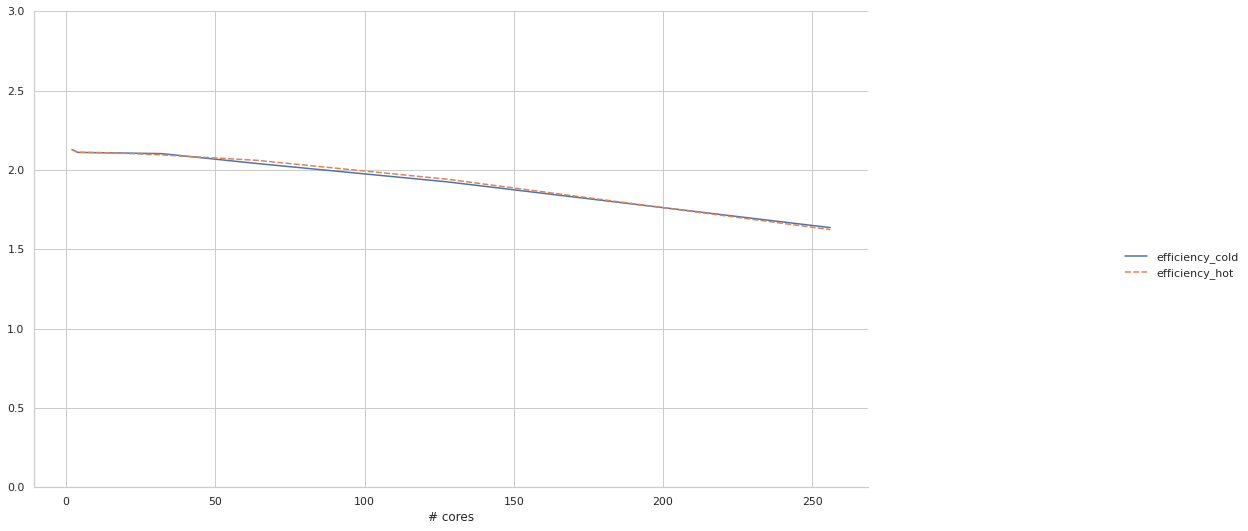

In [88]:
# drop the last value
df3 = df.drop(df.index[-1])

# same plot for efficiency
sns.relplot(data=df3[['efficiency_cold', 'efficiency_hot']], kind="line")
# revert x axis
ax = plt.gca()
# ax.invert_xaxis()
# make plot wider
fig = ax.get_figure()
fig.set_size_inches(20, 8)
# make plot go from 0 to 1
ax.set_ylim(0, 3)

In [136]:
7015874 / 2233

3141.9050604567847

In [140]:
matrix_size = [64*64, 32*32, 16*16]
matrx_size_str = ['64x64', '32x32', '16x16']
cycles = [16749, 8519, 4462]

[1.9660758304965371, 1.9092335275661139]


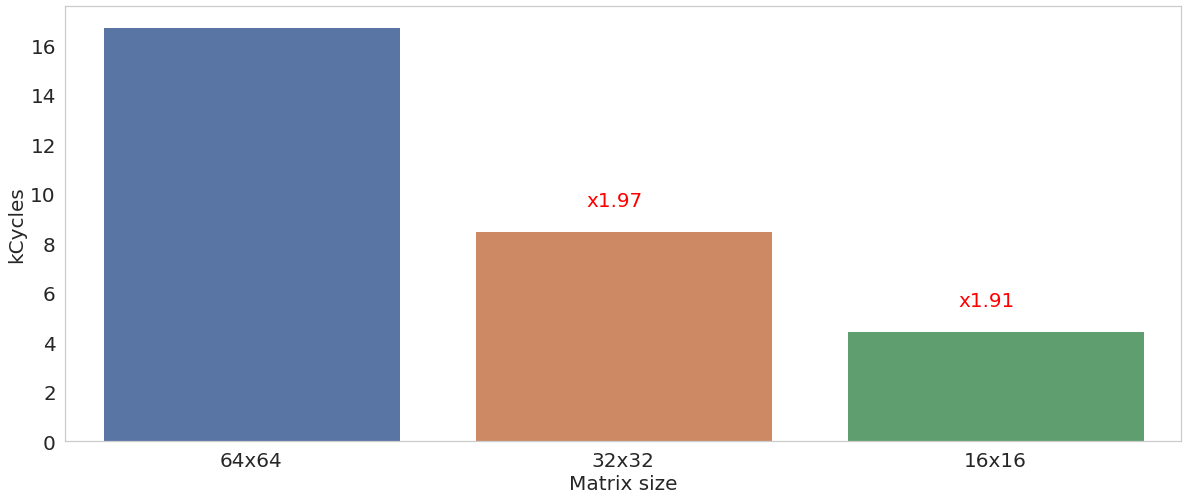

In [162]:
# plot matrix size vs cycles
ax = sns.barplot(x=matrx_size_str, y=cycles)
# make plot wider
fig = ax.get_figure()
fig.set_size_inches(20, 8)
# divide y axis by 1K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000))))
# increase y tick font size
ax.tick_params(axis='y', which='major', labelsize=20)
# increase x tick font size
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel(ylabel='kCycles', fontsize=20)
ax.set_xlabel(xlabel='Matrix size', fontsize=20)
# plot speedup from one bare to the next
speedup = [cycles[0]/cycles[1], cycles[1]/cycles[2]]
print(speedup)
# annotate speedup
ax.annotate("x{:0.2f}".format(speedup[0]), 
            xy=(0.9, cycles[1] + 1000), 
            xytext=(0,0), 
            textcoords="offset points", 
            fontsize=20,
            color='red');
ax.annotate("x{:0.2f}".format(speedup[1]),
            xy=(1.9, cycles[2] + 1000),
            xytext=(0,0),
            textcoords="offset points",
            fontsize=20,
            color='red');

ax.grid(False)
# increase y tick font size


In [164]:
matrix_size_32bit = [64*64*32, 32*32*32, 16*16*32]
# convert to KiB
matrix_size_32bit = [x * 4 / 1024 for x in matrix_size_32bit]
print(matrix_size_32bit)

[512.0, 128.0, 32.0]


[1.0, 1.9660758304965371, 3.7536978933213807]


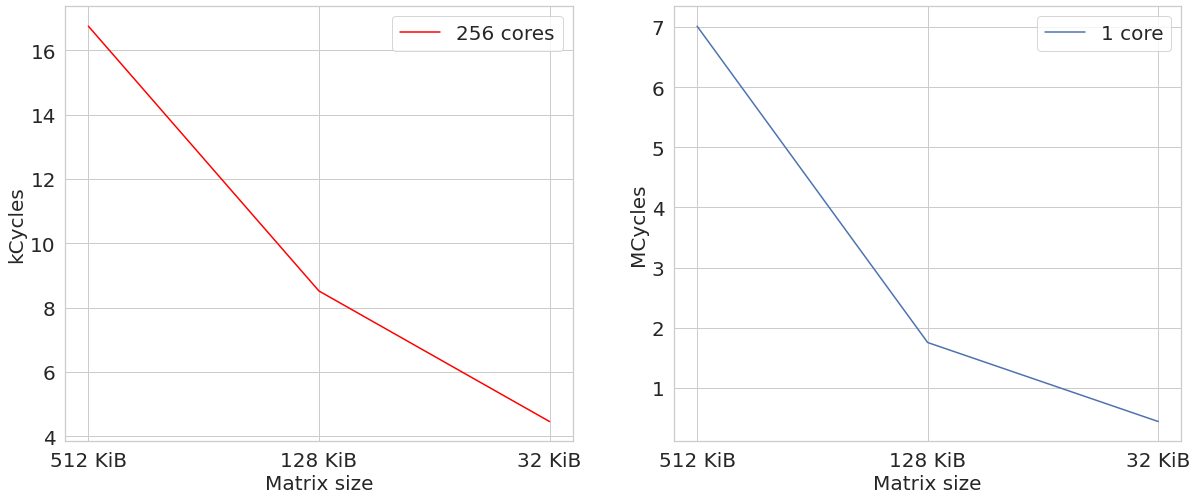

In [195]:
matrix_size = [64*64, 32*32, 16*16]
matrx_size_str = ['512 KiB', '128 KiB', '32 KiB']
cycles_256core = [16749, 8519, 4462]
cycles_1core = [7015874, 1753252, 438776]

single_core_speedup = [7015874 / 7015874, 7015874 / 1753252, 7015874 / 438776]
multi_core_speedup = [16749 / 16749, 16749 / 8519, 16749 / 4462]
print(multi_core_speedup)

# make two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.set_size_inches(20, 8)
ax1 = sns.lineplot(x=matrx_size_str, y=cycles_256core, ax=ax1, label='256 cores', color='red')
# divide y axis by 1K
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000))))
# increase y tick font size
ax1.tick_params(axis='y', which='major', labelsize=20)
# increase x tick font size
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.set_ylabel(ylabel='kCycles', fontsize=20)
ax1.set_xlabel(xlabel='Matrix size', fontsize=20)
# show legend
ax1.legend(fontsize=20)

ax2 = sns.lineplot(x=matrx_size_str, y=cycles_1core, ax=ax2, label='1 core')
# # divide y axis by 1M
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))
# increase y tick font size
ax2.tick_params(axis='y', which='major', labelsize=20)
# increase x tick font size
ax2.tick_params(axis='x', which='major', labelsize=20)
ax2.set_ylabel(ylabel='MCycles', fontsize=20)
ax2.set_xlabel(xlabel='Matrix size', fontsize=20)
# make ax2 y axis visible
ax2.spines['right'].set_visible(True)
# show legend
ax2.legend(fontsize=20)
